In [26]:
import pandas as pd

In [27]:
# df = pd.read_csv('data/Fahrraddiebstahl.csv') # not running, encoding must be set!
df = pd.read_csv('data/Fahrraddiebstahl.csv', encoding='latin-1')
df.columns = df.columns.str.lower()

[Website zum Datensatz daten.berlin.de](https://daten.berlin.de/datensaetze/fahrraddiebstahl-berlin)

- Lizenz:
    - Creative Commons Namensnennung CC-BY License
- Kategorie:
   - Öffentliche Sicherheit
- Geographische Abdeckung: 
    - Berlin
- Geographische Granularität: 
    - Berlin
- Zeitliche Granularität: 
    - Tag
- Veröffentlicht: 
    - 08.09.2021
- Aktualisiert: 
    - 09.09.2021
- Veröffentlichende Stelle: 
    - Polizei Berlin LKA St 14
- E-Mail Kontakt: 
    - onlineredaktion AT polizei.berlin.de

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   angelegt_am            39407 non-null  object
 1   tatzeit_anfang_datum   39407 non-null  object
 2   tatzeit_anfang_stunde  39407 non-null  int64 
 3   tatzeit_ende_datum     39407 non-null  object
 4   tatzeit_ende_stunde    39407 non-null  int64 
 5   lor                    39407 non-null  int64 
 6   schadenshoehe          39407 non-null  int64 
 7   versuch                39407 non-null  object
 8   art_des_fahrrads       39407 non-null  object
 9   delikt                 39407 non-null  object
 10  erfassungsgrund        39407 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


In [29]:
df.head(2)

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund
0,14.09.2020,10.09.2020,10,10.09.2020,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,29.09.2020,09.09.2020,16,10.09.2020,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [30]:
# import geopandas as gpd
# import fiona

# gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
# df2 = gpd.read_file('data/LOR_KMZ_2019/Bezirksregion_EPSG_4326.kmz', driver='KML')

In [31]:
import fiona
shape_plr = fiona.open('data/LOR_SHP_2021/lor_plr.shp')
shape_bzr = fiona.open('data/LOR_SHP_2021/lor_bzr.shp')
shape_pgr = fiona.open('data/LOR_SHP_2021/lor_pgr.shp')
shape_plr.schema

{'properties': OrderedDict([('PLR_ID', 'str:254'), ('PLR_NAME', 'str:254')]),
 'geometry': 'Polygon'}

### digits
PLR 8 most granular  
BZR 6  
PGR 4

In [32]:
type(shape)

fiona.collection.Collection

In [33]:
import geopandas as gdp

In [34]:
# Build the GeoDataFrame from Fiona Collection
gdf = gdp.GeoDataFrame.from_features([feature for feature in shape_plr])#, crs=crs)
# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(shape.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
gdf = gdf[columns]

In [35]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

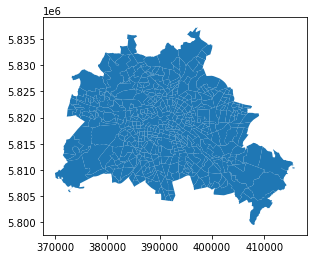

In [36]:
gdf.plot();

In [37]:
gdf

,PLR_ID,PLR_NAME,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."
2,08401246,Waltersdorfer Chaussee Ost,"POLYGON ((398909.474 5806709.670, 398907.398 5..."
3,08401243,Alt-Rudow,"POLYGON ((399260.777 5809071.777, 399251.106 5..."
4,08401242,Zittauer Straße,"POLYGON ((397378.822 5808471.734, 397377.582 5..."
...,...,...,...
537,06200314,Kaiser-Wilhelm-Straße,"POLYGON ((387137.770 5810914.331, 387134.022 5..."
538,06200421,Königsberger Straße,"POLYGON ((386158.015 5809953.079, 386138.149 5..."
539,06200422,Oberhofer Platz,"POLYGON ((386577.591 5808801.810, 386554.090 5..."
540,12100205,Teichstraße,"POLYGON ((388784.556 5826118.378, 388783.944 5..."


In [38]:
import pandas as pd
# df = pd.read_csv('data/Fahrraddiebstahl.csv') # not running, encoding must be set!
df = pd.read_csv('data/Fahrraddiebstahl.csv', encoding='latin-1')
df.columns = df.columns.str.lower()

In [39]:
df.head(1)

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund
0,14.09.2020,10.09.2020,10,10.09.2020,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [40]:
gdf.head(1)

,PLR_ID,PLR_NAME,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."


In [41]:
df['lor_str'] = df['lor'].map(lambda x: (str(x)))
df['lor_zf'] = df['lor_str'].apply(lambda x: x.zfill(8))
df['plr_id'] = df['lor_zf'].map(lambda x: (x))
df['bzr_id'] = df['lor_zf'].map(lambda x: (x)[-6:])
df['pgr_id'] = df['lor_zf'].map(lambda x: (x)[-4:])

In [42]:
df.shape

(39407, 16)

df.shape initially: (39407, 19)

In [43]:
df.head(2)

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund,lor_str,lor_zf,plr_id,bzr_id,pgr_id
0,14.09.2020,10.09.2020,10,10.09.2020,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,3400723,03400723,03400723,400723,0723
1,29.09.2020,09.09.2020,16,10.09.2020,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,9200716,09200716,09200716,200716,0716


In [44]:
gdf.head(2)

,PLR_ID,PLR_NAME,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."


In [45]:
gdf.columns = gdf.columns.str.lower()
gdf.head(2)

,plr_id,plr_name,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."


In [46]:
full_df = gdf.merge(df, on='plr_id')
full_df

,plr_id,plr_name,geometry,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund,lor_str,lor_zf,bzr_id,pgr_id
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5...",11.09.2020,04.09.2020,10,04.09.2020,10,8401245,305,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8401245,08401245,401245,1245
1,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5...",09.09.2021,07.09.2021,21,08.09.2021,6,8401245,1800,Nein,Fahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,8401245,08401245,401245,1245
2,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5...",12.10.2021,10.10.2021,16,11.10.2021,15,8401245,2532,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8401245,08401245,401245,1245
3,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5...",17.06.2021,08.06.2021,16,09.06.2021,6,8401245,589,Nein,Herrenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...,8401245,08401245,401245,1245
4,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5...",17.09.2021,16.09.2021,23,17.09.2021,3,8401245,449,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8401245,08401245,401245,1245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39402,12100206,Humboldtstraße,"POLYGON ((388011.067 5826640.665, 388011.918 5...",01.11.2021,31.10.2021,17,01.11.2021,7,12100206,350,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12100206,12100206,100206,0206
39403,12100206,Humboldtstraße,"POLYGON ((388011.067 5826640.665, 388011.918 5...",15.03.2020,12.03.2020,17,13.03.2020,15,12100206,3990,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12100206,12100206,100206,0206
39404,12100206,Humboldtstraße,"POLYGON ((388011.067 5826640.665, 388011.918 5...",20.04.2020,17.04.2020,23,18.04.2020,8,12100206,579,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12100206,12100206,100206,0206
39405,12100206,Humboldtstraße,"POLYGON ((388011.067 5826640.665, 388011.918 5...",12.07.2021,10.07.2021,20,12.07.2021,10,12100206,850,Nein,Rennrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,12100206,12100206,100206,0206


In [47]:
gdf['plr_id'] = gdf['plr_id'].astype(str) 

In [48]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plr_id    542 non-null    object  
 1   plr_name  542 non-null    object  
 2   geometry  542 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 12.8+ KB


In [49]:
df.bzr_id = df.bzr_id.str.encode('utf-8')

In [50]:
gdf.bzr_id = gdf.plr_id.str.encode('utf-8')

/Users/matthiasmotl/opt/anaconda3/envs/env_motl/lib/python3.10/site-packages/geopandas/geodataframe.py:182: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


In [51]:
type(pd.merge(
    df, 
    gdf, 
    on='plr_id', 
    how='left'))

pandas.core.frame.DataFrame

In [57]:
df_full = pd.merge(
    gdf, 
    df, 
    on='plr_id', 
    how='left')

In [59]:
type(df_full)

geopandas.geodataframe.GeoDataFrame

In [58]:
df_full.head(2)

,plr_id,plr_name,geometry,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund,lor_str,lor_zf,bzr_id,pgr_id
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5...",11.09.2020,04.09.2020,10.0,04.09.2020,10.0,8401245.0,305.0,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,8401245,08401245,b'401245',1245
1,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5...",09.09.2021,07.09.2021,21.0,08.09.2021,6.0,8401245.0,1800.0,Nein,Fahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,8401245,08401245,b'401245',1245


In [60]:
df_full.dropna(axis=0, inplace=True)
df_full.shape

(39407, 18)

In [62]:
df_full.isnull().sum()

plr_id                   0
plr_name                 0
geometry                 0
angelegt_am              0
tatzeit_anfang_datum     0
tatzeit_anfang_stunde    0
tatzeit_ende_datum       0
tatzeit_ende_stunde      0
lor                      0
schadenshoehe            0
versuch                  0
art_des_fahrrads         0
delikt                   0
erfassungsgrund          0
lor_str                  0
lor_zf                   0
bzr_id                   0
pgr_id                   0
dtype: int64

In [63]:
# Load an empty map
from keplergl import KeplerGl #import class KeplerGl from module keplergl ()
map_1 = KeplerGl() #create an instance of this class
# map_1 = KeplerGl(height=200)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [36]:

map_1.add_data(data=df_full, name='geometry')

In [37]:

map_1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'bnuku2e', 'type': …

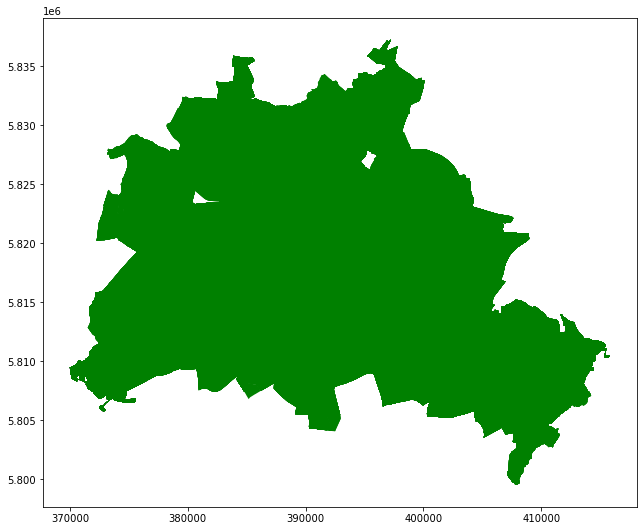

In [38]:
%matplotlib inline
df_full.plot(color='green', markersize=15, figsize=(15,9));


In [36]:
type(df_short)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Build the GeoDataFrame from Fiona Collection
gd = gdp.GeoDataFrame.from_features([feature for feature in shape])#, crs=crs)
# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(shape.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
gdf = gdf[columns]

In [ ]:
df.head(5)

In [ ]:
df.loc[df['art_des_fahrrads'].str.contains("herren", case=False)]

In [ ]:
df

In [ ]:
type(df)